규제
  - 충분히 큰 신경망 구조를 사용하되 다양한 규제 기법
  - 데이터증대
  - 드랍아웃
  - 가중치 감쇠
  - 앙상블
  - 배치 정규화 등등

데이터 증대

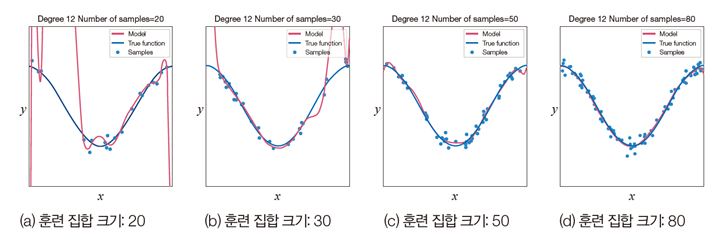

딥러닝에서 데이터증대
  - 영상을 이동, 회전 또는 좌우 반전
  - 명암을 조정
  - 텐서플로에서 제공(해당 함수)

In [3]:
import tensorflow  as tf
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train),(x_test,y_test) =  tf.keras.datasets.cifar10.load_data()
x_train = x_train / 255.0; x_test = x_test/255.0
x_train = x_train[:12]; y_train = y_train[:12]

 14450688/170498071 [=>............................] - ETA: 23s

KeyboardInterrupt: ignored

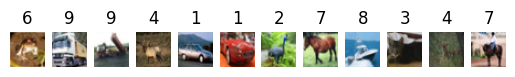

In [3]:
for i in range(12):
  plt.subplot(1,12,i+1)
  plt.imshow(x_train[i])
  plt.title(y_train[i][0])
  plt.axis('off')
plt.show()

In [4]:
# 한번에 생성하는 양
batch_size = 6
ImageDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator

In [5]:
generator = ImageDataGenerator(rotation_range=30.0,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True)
gen = generator.flow(x_train,y_train,batch_size)

In [6]:
# 첫번재 증대하고 시각화
img,label =  gen.next()

In [7]:
img.shape, label.shape

((6, 32, 32, 3), (6, 1))

In [8]:
def showImages(x_train,y_train,size):
  for i in range(size):
    plt.subplot(1,size,i+1)
    plt.imshow(x_train[i])
    plt.title(y_train[i][0])
    plt.axis('off')
  plt.show()

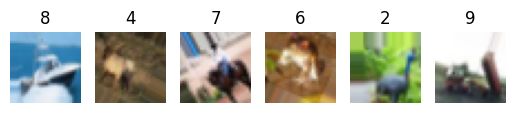

In [9]:
showImages(img,label,batch_size)

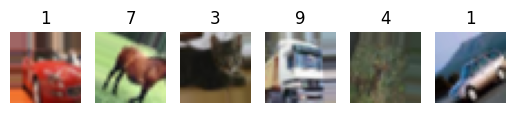

In [10]:
# 두번째 증복하고 시각화
img,label =  gen.next()
showImages(img,label,batch_size)

모델 설계
  - C-C-P-D C-C-P-D-FC-D-FC
  - 커널 32 32 64 64
  - DO : 0.25 0.25 0.5
  - act : relu  
  - out : softmax

In [4]:
(x_train,y_train),(x_test,y_test) =  tf.keras.datasets.cifar10.load_data()
x_train = x_train / 255.0; x_test = x_test/255.0
x_train.shape,y_train.shape
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)
x_train.shape, y_train.shape

170498071/170498071 [==============================] - 13s 0us/step


((50000, 32, 32, 3), (50000, 10))

In [5]:
def makeNetwork(dropout_rate):
  conv2d = tf.keras.layers.Conv2D
  pool2d = tf.keras.layers.MaxPool2D
  dropout =tf.keras.layers.Dropout
  dense = tf.keras.layers.Dense

  inputs = tf.keras.Input(shape=(32,32,3))
  x = conv2d(32,3,activation='relu')(inputs)
  x = conv2d(32,3,activation='relu')(x)
  x = pool2d()(x)
  x = dropout(dropout_rate[0])(x)

  x = conv2d(64,3,activation='relu')(x)
  x = conv2d(64,3,activation='relu')(x)
  x = pool2d()(x)
  x = dropout(dropout_rate[1])(x)

  x = tf.keras.layers.Flatten()(x)

  x = dense(512,activation='relu')(x)
  x = dropout(dropout_rate[2])(x)
  outputs = dense(10,activation='softmax')(x)
  model = tf.keras.Model(inputs=inputs, outputs=outputs)
  return model

In [40]:
model = makeNetwork([0.25,0.25,0.5])
model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_40 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_41 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 dropout_30 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 conv2d_42 (Conv2D)          (None, 12, 12, 64)        18496     
                                                          

신경망 학습방법 정의
  - compile

In [43]:
model = makeNetwork([0.25,0.25,0.5])
model.compile(loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])
# hist = model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test) )
# 이미지 제너레이터 설정
batch_size = 128
generator = ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True)
gen = generator.flow(x_train,y_train,batch_size)
hist = model.fit(gen,epochs=50,validation_data=(x_test,y_test) )

Epoch 1/50
391/391 [==============================] - 34s 83ms/step - loss: 1.8722 - accuracy: 0.3123 - val_loss: 1.4569 - val_accuracy: 0.4751
Epoch 2/50
391/391 [==============================] - 31s 78ms/step - loss: 1.5085 - accuracy: 0.4504 - val_loss: 1.2585 - val_accuracy: 0.5503
Epoch 3/50
391/391 [==============================] - 32s 82ms/step - loss: 1.3361 - accuracy: 0.5205 - val_loss: 1.0981 - val_accuracy: 0.6084
Epoch 4/50
391/391 [==============================] - 30s 77ms/step - loss: 1.2260 - accuracy: 0.5649 - val_loss: 1.0751 - val_accuracy: 0.6141
Epoch 5/50
391/391 [==============================] - 30s 76ms/step - loss: 1.1484 - accuracy: 0.5941 - val_loss: 0.9613 - val_accuracy: 0.6580
Epoch 6/50
391/391 [==============================] - 31s 79ms/step - loss: 1.0907 - accuracy: 0.6136 - val_loss: 0.8993 - val_accuracy: 0.6816
Epoch 7/50
391/391 [==============================] - 30s 77ms/step - loss: 1.0342 - accuracy: 0.6356 - val_loss: 0.9250 - val_accuracy:

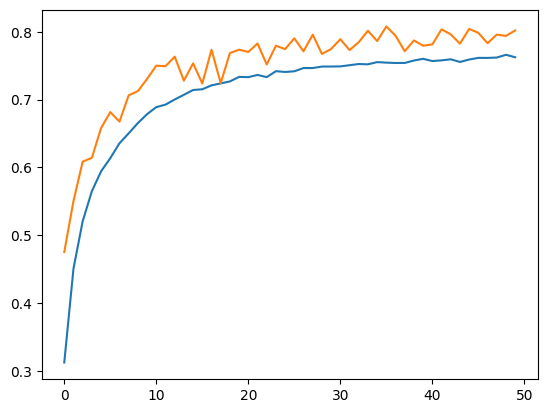

In [44]:
# 정확률
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.show()

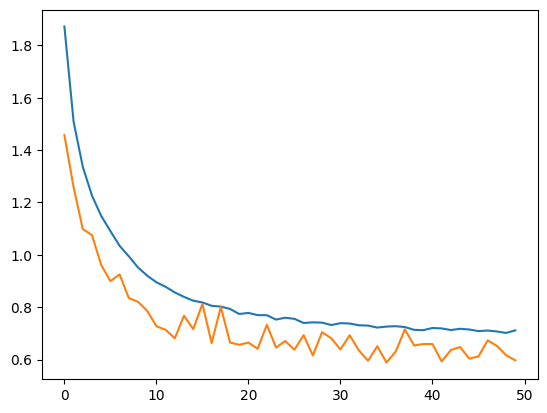

In [45]:
# 손실률
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()

In [47]:
model.evaluate(x_train,y_train),model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.5966 - accuracy: 0.8020


([0.4780799150466919, 0.8347399830818176],
 [0.5966177582740784, 0.8019999861717224])

교차검증으로 드랍아웃의 성능향상 효과 측정

In [6]:
from sklearn.model_selection import KFold

In [7]:
# 하이퍼 매개변수
batch_size = 128
n_epochs = 10
k = 5
def cross_validation(dropout_rate):
  accuracy = []
  for train_index,val_index in  KFold(k).split(x_train):
    # 훈련 집합과 검증집합으로 분할
    xtrain,xval =  x_train[train_index], x_train[val_index]
    ytrain,yval =  y_train[train_index], y_train[val_index]
    # 모델 설계
    model = makeNetwork(dropout_rate)
    # 모델을 학습하고 평가
    model.compile(optimizer='adam', loss = tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])
    model.fit(xtrain,ytrain,batch_size=batch_size,epochs=n_epochs)
    accuracy.append(model.evaluate(xval,yval)[1])
  return accuracy

In [ ]:
acc_widhout_dropout = cross_validation([0.0,0.0,0.0])
acc_widh_dropout = cross_validation([0.25,0.25,0.5])

acc_widhout_dropout : 0.7265200018882751
acc_widh_dropout : 0.7475800037384033


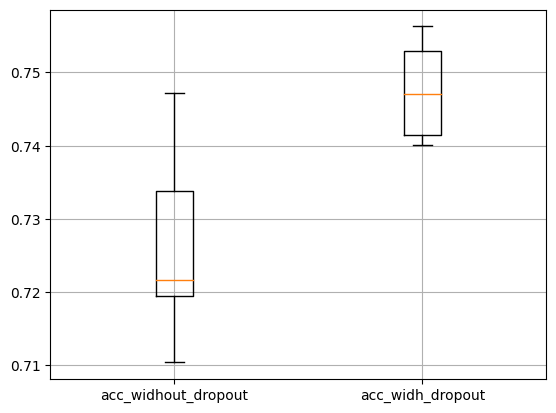

In [9]:
import numpy as np
print(f'acc_widhout_dropout : {np.array(acc_widhout_dropout).mean()}')
print(f'acc_widh_dropout : {np.array(acc_widh_dropout).mean()}')
# 박스플랏으로 성능을 시각화
plt.grid()
plt.boxplot([acc_widhout_dropout,acc_widh_dropout], labels=['acc_widhout_dropout','acc_widh_dropout'])
plt.show()

가중치 감쇠
  - over fit 과잉접합에서는 가중치가 아주큰 현상
  - 가중치 감쇠 : 성능을 유지하면서 가중치를 크게 낮추는 규제
  - 정규화
  - L1 : 가중치의 절대값에 비례하는 패널티를 적용
  - L1손실 : 강도*(가중치절대값합)
  
  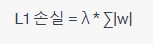

In [ ]:
regularizers = tf.keras.regularizers
tf.keras.layers.Dense(64,activation='relu'
,kernel_regularizer=regularizers.l2(0.01)
,bias_regularizer=regularizers.l2(0.01)
,activity_regularizer=regularizers.l2(0.01)
)

신경망(딥러닝) overfitting(과대적합)
  - 드랍아웃
  - 정규화(L1, L2)
    - 커널, 바이어스, 활성화함수
    - tf.keras.regularizers
      - kernel_regularizer
      - bias_regularizer
      - activity_regularizer
  - 정규화 대상은 Dense 밀집층
    - tf.keras.layers.Dense(64,activation='relu'
,kernel_regularizer=regularizers.l2(0.01)
,bias_regularizer=regularizers.l2(0.01)
,activity_regularizer=regularizers.l2(0.01)
)


제거 조사(ablation study)
  - 여러 선택 사항이 있을때 선택 사항을 하나씩 빼고 성능을 측정해서 각각의 기여도를 평가

In [5]:
# cifar-10 데이터셋
import tensorflow as tf
from sklearn.model_selection import KFold
def getData():
  (x_train,y_train),(x_test,y_test) =  tf.keras.datasets.cifar10.load_data()
  x_train = x_train / 255.0; x_test = x_test/255.0
  y_train =tf.keras.utils.to_categorical(y_train,10)
  y_test = tf.keras.utils.to_categorical(y_test,10)
  return (x_train,y_train),(x_test,y_test)
# 하이퍼 매개변수
batch_size = 128
n_epochs = 3
k = 5

(x_train,y_train),(x_test,y_test) = getData()

regularizers = tf.keras.regularizers

def makeNetwork(dropout_rate,l2_reg):
  conv2d = tf.keras.layers.Conv2D
  pool2d = tf.keras.layers.MaxPool2D
  dropout =tf.keras.layers.Dropout
  dense = tf.keras.layers.Dense

  inputs = tf.keras.Input(shape=(32,32,3))
  x = conv2d(32,3,activation='relu')(inputs)
  x = conv2d(32,3,activation='relu')(x)
  x = pool2d()(x)
  x = dropout(dropout_rate[0])(x)

  x = conv2d(64,3,activation='relu')(x)
  x = conv2d(64,3,activation='relu')(x)
  x = pool2d()(x)
  x = dropout(dropout_rate[1])(x)

  x = tf.keras.layers.Flatten()(x)

  x = dense(512,activation='relu')(x)
  x = dropout(dropout_rate[2])(x)
  outputs = dense(10,activation='softmax',kernel_regularizer=regularizers.l2(l2_reg))(x)
  model = tf.keras.Model(inputs=inputs, outputs=outputs)
  return model

ImageDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator

def cross_validation(dropout_rate,data_gen,l2_reg,savename):
  accuracy = []
  for train_index,val_index in  KFold(k).split(x_train):
    # 훈련 집합과 검증집합으로 분할
    xtrain,xval =  x_train[train_index], x_train[val_index]
    ytrain,yval =  y_train[train_index], y_train[val_index]
    # 모델 설계
    model = makeNetwork(dropout_rate,l2_reg)
    # 모델을 학습하고 평가
    model.compile(optimizer='adam', loss = tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])
    if data_gen:
      generator = ImageDataGenerator(rotation_range=30.0,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True)
      gen = generator.flow(xtrain,ytrain,batch_size)
      model.fit(gen,batch_size=batch_size,epochs=n_epochs,verbose=2)
    else:
      model.fit(xtrain,ytrain,batch_size=batch_size,epochs=n_epochs,verbose=2)

    accuracy.append(model.evaluate(xval,yval)[1])

    temp = pd.DataFrame(accuracy)
    temp.to_csv(savename)
  return accuracy

In [ ]:
import pandas as pd
# 딥러닝 튜닝
# dropout_rate,data_gen,l2_reg
# 000, 001, 010 ,011, 100, 101, 110,111
acc_000 = cross_validation([0.0,0.0,0.0],False,0.0,'/content/drive/MyDrive/acc_000')
acc_001 = cross_validation([0.0,0.0,0.0],False,0.01,'/content/drive/MyDrive/acc_001')
acc_010 = cross_validation([0.0,0.0,0.0],True,0.0,'/content/drive/MyDrive/acc_010')
acc_011 = cross_validation([0.0,0.0,0.0],True,0.01,'/content/drive/MyDrive/acc_011')
acc_100 = cross_validation([0.25,0.25,0.5],False,0.0,'/content/drive/MyDrive/acc_100')
acc_101 = cross_validation([0.25,0.25,0.5],False,0.01,'/content/drive/MyDrive/acc_101')
acc_110 = cross_validation([0.25,0.25,0.5],True,0.0,'/content/drive/MyDrive/acc_110')
acc_111 = cross_validation([0.25,0.25,0.5],True,0.01,'/content/drive/MyDrive/acc_111')

Epoch 1/3
313/313 - 6s - loss: 1.5814 - accuracy: 0.4209 - 6s/epoch - 18ms/step
Epoch 2/3
313/313 - 2s - loss: 1.2047 - accuracy: 0.5722 - 2s/epoch - 7ms/step
Epoch 3/3
313/313 - 2s - loss: 1.0003 - accuracy: 0.6474 - 2s/epoch - 7ms/step
313/313 [==============================] - 1s 3ms/step - loss: 0.9667 - accuracy: 0.6645
Epoch 1/3
313/313 - 5s - loss: 1.5710 - accuracy: 0.4241 - 5s/epoch - 17ms/step
Epoch 2/3
313/313 - 2s - loss: 1.1864 - accuracy: 0.5799 - 2s/epoch - 7ms/step
Epoch 3/3
313/313 - 2s - loss: 0.9845 - accuracy: 0.6539 - 2s/epoch - 7ms/step
313/313 [==============================] - 2s 5ms/step - loss: 1.0225 - accuracy: 0.6436
Epoch 1/3
313/313 - 4s - loss: 1.5807 - accuracy: 0.4248 - 4s/epoch - 14ms/step
Epoch 2/3
313/313 - 2s - loss: 1.1831 - accuracy: 0.5829 - 2s/epoch - 7ms/step
Epoch 3/3
313/313 - 2s - loss: 0.9836 - accuracy: 0.6539 - 2s/epoch - 7ms/step
313/313 [==============================] - 1s 4ms/step - loss: 0.9343 - accuracy: 0.6734
Epoch 1/3
313/313 -